In [3]:
import os
import shutil
import argparse
import numpy as np
import math
#from core.data_provider import datasets_factory
from DataFactory4 import DataTypeEnum,CustomDataLoader,CustomDataset
import matplotlib.pyplot as plt

In [4]:
DS=CustomDataset(dataSetName='PBSet1',dataRoot="./DataSet/",dataType=DataTypeEnum.Lcap2slice,randOrFix=1,sequence_length=16,
                 useClips=True,withChannel=True,ChannelLast=True,px=1,size=128,randFlag=1)
cDL=CustomDataLoader(DS,train_batch_size=4,test_batch_size=4,train_ratio=0.9,shuffle=True)

data prepare finished.....


In [5]:
train_dataLoader,test_dataLoader=cDL.train_dataloader,cDL.test_dataloader

In [6]:
len(DS),len(train_dataLoader),len(test_dataLoader)

(6681, 1503, 168)

In [7]:
batch=next(iter(train_dataLoader))
sequences_cap,sequences_slice,durations=batch['sequences_cap'],batch["sequences_slice"],batch['durations']
sequences_cap.shape,sequences_slice.shape

(torch.Size([4, 16, 128, 128, 1]), torch.Size([4, 16, 128, 128, 1]))

In [8]:
durations

tensor([[[ 0.0000],
         [ 0.8700],
         [ 2.4800],
         [ 3.1000],
         [ 4.0500],
         [ 4.6800],
         [ 4.9600],
         [ 6.0200],
         [ 7.1700],
         [ 9.2800],
         [ 9.4600],
         [ 9.8400],
         [11.2400],
         [12.5700],
         [13.8200],
         [14.2700]],

        [[ 0.0000],
         [ 0.6700],
         [ 4.7000],
         [ 5.2800],
         [ 5.9200],
         [ 6.8700],
         [ 7.6300],
         [ 8.1900],
         [ 8.6100],
         [10.6000],
         [12.4100],
         [12.4300],
         [12.4600],
         [14.1400],
         [15.0800],
         [16.1900]],

        [[ 0.0000],
         [ 1.5200],
         [ 1.8800],
         [ 3.2600],
         [ 3.4800],
         [ 4.0400],
         [ 5.1700],
         [ 6.8800],
         [ 7.4400],
         [ 9.9000],
         [11.3600],
         [12.9700],
         [13.8400],
         [14.1300],
         [16.2700],
         [17.6500]],

        [[ 0.0000],
         [ 0.6

In [9]:
b,s,h,w,c=sequences_slice.shape

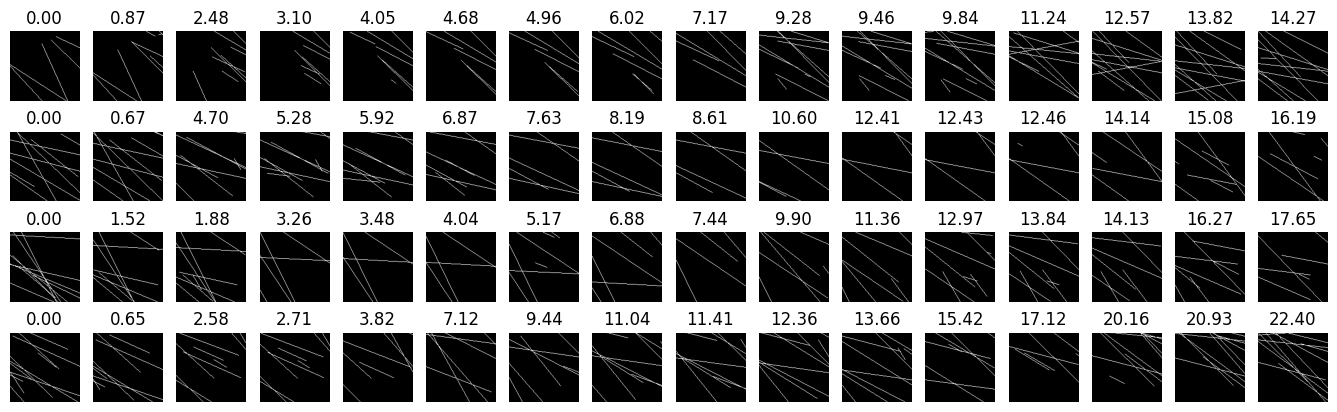

In [10]:
#sequence by slice
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_slice[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())

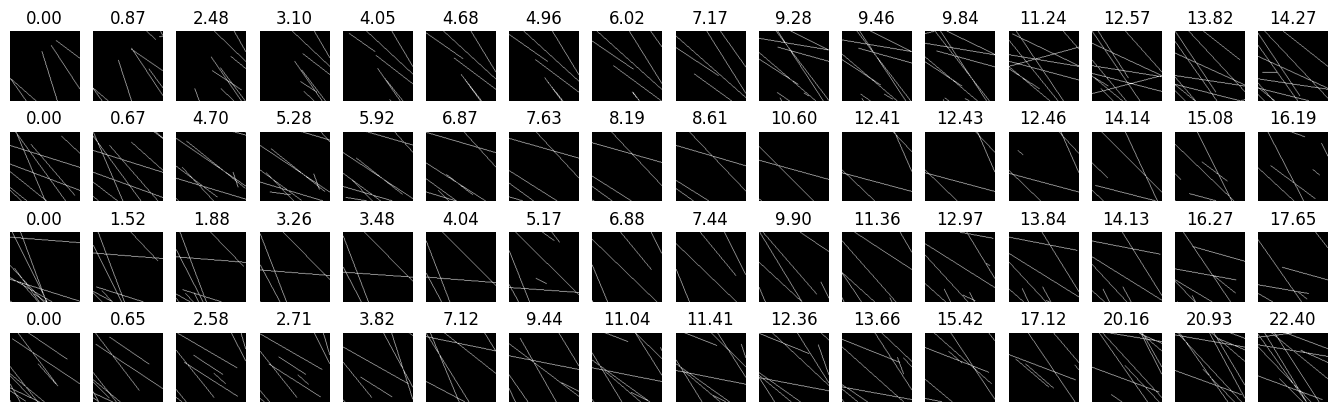

In [11]:
#sequence by capture
b,s,h,w,c=sequences_cap.shape
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_cap[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())

In [12]:
sequences_con=np.concatenate([sequences_cap[:,:8,:,:,:],sequences_slice[:,8:,:,:,:]],axis=1)
b,s,h,w,c=sequences_con.shape
print(sequences_con.shape)

(4, 16, 128, 128, 1)


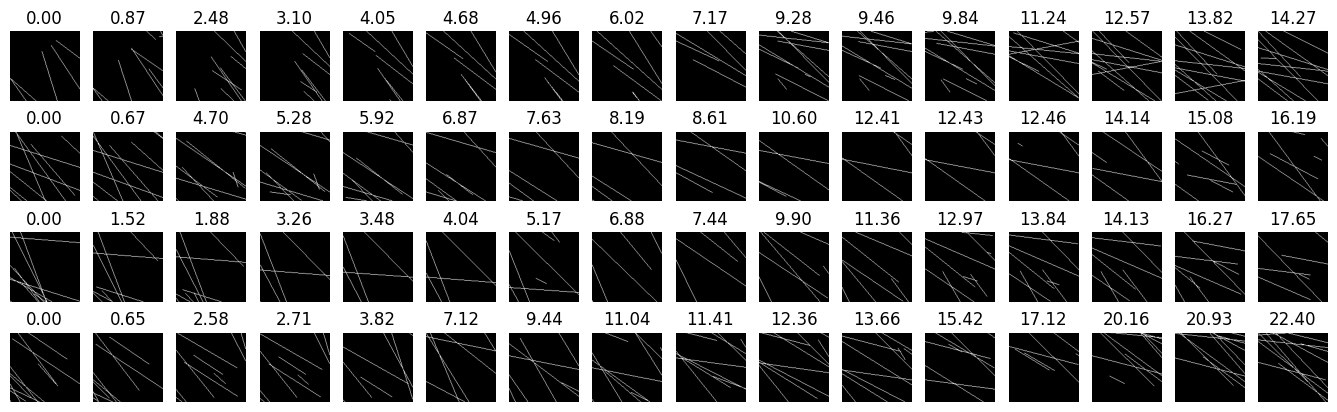

In [13]:
#sequence by capture to slice
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_con[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())
        # if i==0 and j<8:
        #     a[i][j].set_title("capture")
        # if i==0 and j>=8:
        #     a[i][j].set_title("slice")